object


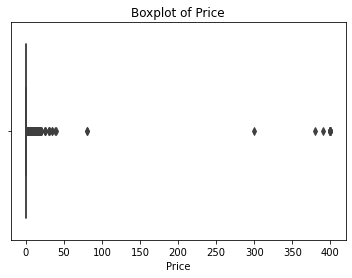

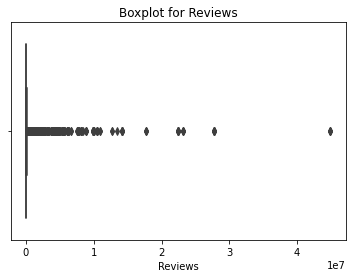

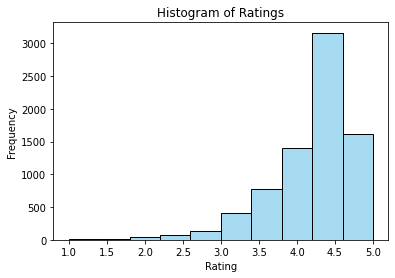

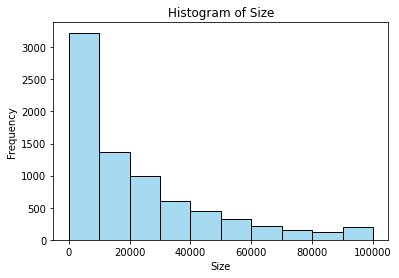

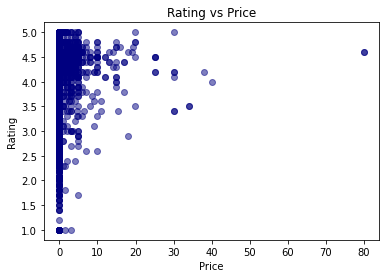

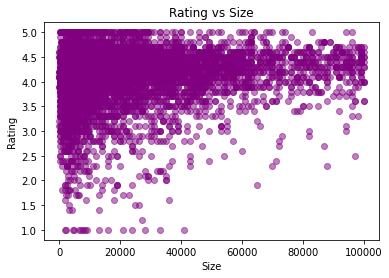

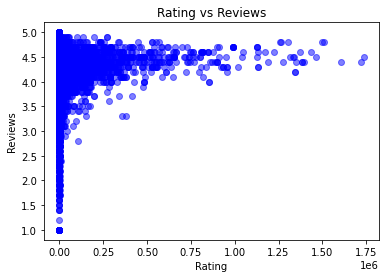

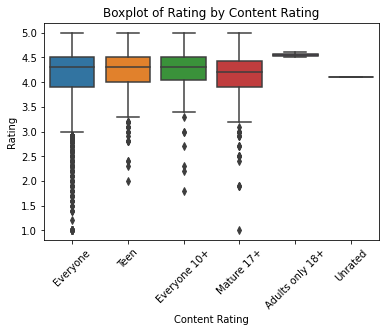

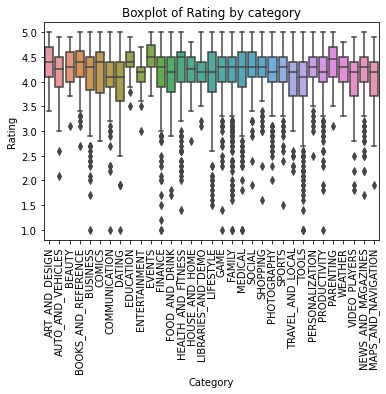

R² Score on Training Set: 0.1508
R² Score on Test Set: 0.1383


In [12]:
#29 April 2025
#Hlanhla Hlungwane
#PROJECT NAME - App Rating Prediction 
#PROJECT OBJECTIVE - Make a model to predoct the app rating on an APP store. 

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("googleplaystore.csv")                      #Read the csv file
df.replace("Varies with device", np.nan, inplace = True)     # Replace all "?" to NaN
missing_data = df.isnull()                                   #Check for missing values
#missing_data.head(10)

#for column in missing_data.columns.values.tolist():         #To count the number of missing values in each column
#    print(column)
#    print(missing_data[column].value_counts())
#    print("")

df.dropna(subset = ["Rating", "Type", "Content Rating", "Current Ver", "Android Ver", "Size"], axis =0, inplace = True)        #Drop all rows with Null/missing values
df.reset_index (drop = True, inplace = True)                                                                           #Reseting the index as rows were droped

#print(df.isnull().sum())                                    #Counting the number of missing values
#print(len(df));                                             #Checking the number of rows left

#Function to convert size to numerical value and convert MB to kb
def convert_size_to_mb(size_str):
    if isinstance(size_str, (int, float)):  # Check if already a number
        return size_str  # Or handle as needed (e.g., return np.nan)

    size_str = str(size_str).lower()  # Ensure case consistency, convert to string first
    size_str = size_str.replace(',', '.') #replacing comma with dot

    if 'm' in size_str:
        size_mb = float(size_str.replace('m', '').strip())
        return size_mb * 1000
    elif 'k' in size_str:
        size_kb = float(size_str.replace('k', '').strip())
        return size_kb   # Convert KB to MB
    else:
        return np.nan

# Apply the conversion function to the 'Size' column
print(df['Size'].dtype)                              #Check the datatype before
df['size_kb'] = df['Size'].apply(convert_size_to_mb)
df.drop('Size', axis=1, inplace=True)                # Drop the original 'Size' column

# Display the results
#print(df['size_kb'].head())
#print(df['size_kb'].describe())

df['Reviews'] = df['Reviews'].astype(float)       #Converting the Reviews to int or float. 

# Remove '+' and ',' from the 'Installs' column and convert it to integer
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)  # We Remove '+'
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)  # We Remove ','
df['Installs'] = df['Installs'].astype(int)                        # Convert to integer

#Remove '$' from the price column 
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].astype(float)

# Filter the DataFrame to keep only rows where Rating is between 1 and 5
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]
df.reset_index(drop=True, inplace=True)         # Reset the index after filtering
#print(df['Rating'].describe())  # Ensure all ratings are within the range # Check the result


#Ensuring that reviews are less than istalls
df = df[df['Reviews'] <= df['Installs']]
df.reset_index(drop=True, inplace=True)

# Filter the DataFrame to keep only rows where Free apps have Price = 0
df = df[~((df['Type'] == 'Free') & (df['Price'] > 0))]
df.reset_index(drop=True, inplace=True)                 # Reset the index after filtering


# Boxplot for Price
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

# Box plot for Reviews
sns.boxplot(x=df['Reviews'])
plt.title('Boxplot for Reviews')
plt.xlabel('Reviews')
plt.show()
           
# Histogram for Rating
sns.histplot(df['Rating'], bins=10, kde=False, color='skyblue')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
    
# Histongram for Size
sns.histplot(df['size_kb'], bins=10, kde=False, color='skyblue')
plt.title('Histogram of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

# Check records with very high prices (i.e greater than $200)
high_price_apps = df[df['Price'] > 200]
df = df[df['Price'] <= 200]              # Drop rows where Price > 200
df.reset_index(drop=True, inplace=True)  # Reset the index after filtering

# Records with more than 2 million reviews
high_review_apps = df[df['Reviews'] > 2000000]
df = df[df['Reviews'] <= 2000000]        # Drop rows where Reviews > 2 million
df.reset_index(drop=True, inplace=True)     # Reset the index after filtering

# Get and drop apps beyond the 95th percentile value
cutoff = df['Installs'].quantile(0.95) 
df = df[df['Installs'] <= cutoff]        # Filter the DataFrame to keep only rows where Installs <= 95th percentile
df.reset_index(drop=True, inplace=True)   # Reset the index after filtering


# Scatter plot for Rating vs Price
plt.scatter(df['Price'], df['Rating'], alpha=0.5, color='navy')
plt.title('Rating vs Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

#Scatter plot for Rating vs Size 
plt.scatter(df['size_kb'], df['Rating'], alpha=0.5, color='purple')
plt.title('Rating vs Size')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show() 

#Scatter plot for Rating vs Reviews
plt.scatter(df['Reviews'], df['Rating'], alpha=0.5, color='blue')
plt.title('Rating vs Reviews')
plt.ylabel('Reviews')
plt.xlabel('Rating')
plt.show() 

# Boxplot for Rating vs Content Rating
sns.boxplot(x='Content Rating', y='Rating', data=df)
plt.title('Boxplot of Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Boxplot of Rating by category')
plt.ylabel('Rating')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()

# Create a copy of the original DataFrame and Apply log transformation to Reviews and Installs using np.log1p
inp1 = df.copy()
inp1['Reviews'] = np.log1p(inp1['Reviews'])  # Log transformation for Reviews
inp1['Installs'] = np.log1p(inp1['Installs'])  # Log transformation for Installs

#Drop unwanted columns
inp1.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

#Dummy variables for Category, Genres, and Content Rating
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating'], drop_first=True)

#Train-test split (70% training, 30% testing)
df_train, df_test = train_test_split(inp2, test_size=0.3, random_state=42) 
target = 'Rating'  
X_train = df_train.drop(target, axis=1)
y_train = df_train[target]
X_test = df_test.drop(target, axis=1)
y_test = df_test[target]

# Categorical variables are dummy-encoded in both training and testing sets
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns between X_train and X_test to ensure they have the same structure
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Fill any missing columns in X_test with 0 (this happens if a category exists in train but not in test)
X_test.fillna(0, inplace=True)

# Drop rows with NaN values in X_train and X_test
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Ensure y_train matches the filtered X_train
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  # Ensure y_test matches the filtered X_test

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)                              # Train the model on the training data
y_train_pred = lr.predict(X_train)                    # Predict on the training set
r2_train = r2_score(y_train, y_train_pred)            # Calculate R² score on the training set
print(f"R² Score on Training Set: {r2_train:.4f}")    # Report the R² score

# Predict on the test set
y_test_pred = lr.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)               # Calculate R² score on the test set
print(f"R² Score on Test Set: {r2_test:.4f}")         # Report the R² score